In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn.svm as svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os


In [54]:
def RGBtoGray(data):
    new_data = np.zeros((1, data.shape[1], data.shape[2]))
    for im in data:
        new_data = np.append(new_data, cv2.cvtColor(im.astype('float32'),cv2.COLOR_RGB2GRAY).reshape(1,data.shape[1], data.shape[2]), axis=0)
    return new_data[1:,:,:]

In [55]:
def Flatten(images):
    images = images.reshape(images.shape[0], -1)
    return images

In [56]:
def load(data_path):
    for i, set in enumerate(['Correct', 'Incorrect', 'NoMask']):
        if i == 0:
            data = np.load(data_path+set+'.npy')
            labels = np.array([i]*len(data))
            i += 1
        else:
            data_ = np.load(data_path+set+'.npy')
            data = np.append(data,data_, axis=0)
            labels = np.append(labels, np.array([i]*len(data_)), axis=0)
    print(data.shape, np.array(labels).shape)
    return data, labels


In [57]:
def train_svm(data_path):
    data, labels = load(data_path)
    x = Flatten(RGBtoGray(data)) 
    x_train, x_test , y_train, y_test = train_test_split(x,labels, test_size = 0.2)
    clf = make_pipeline( StandardScaler(), svm.SVC(cache_size=4000, verbose=True))
    clf.fit(x_train, y_train)
    predict = clf.predict(x_test)
    print(metrics.accuracy_score(y_test, predict)) 
    return clf 

In [60]:
data_path = '../Data/Pixel20/'
data, labels = load(data_path)
x = Flatten(RGBtoGray(data)) 
x_train, x_test , y_train, y_test = train_test_split(x,labels, test_size = 0.2)
clf = make_pipeline( StandardScaler(), svm.SVC(cache_size=4000, verbose=True))
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print(metrics.accuracy_score(y_test, predict)) 

(4559, 20, 20, 3) (4559,)
[LibSVM]0.8980263157894737


In [62]:
print(metrics.confusion_matrix(y_test, predict))
confusion = metrics.confusion_matrix(y_test, predict)

[[293  10  13]
 [ 17 276  24]
 [ 11  18 250]]


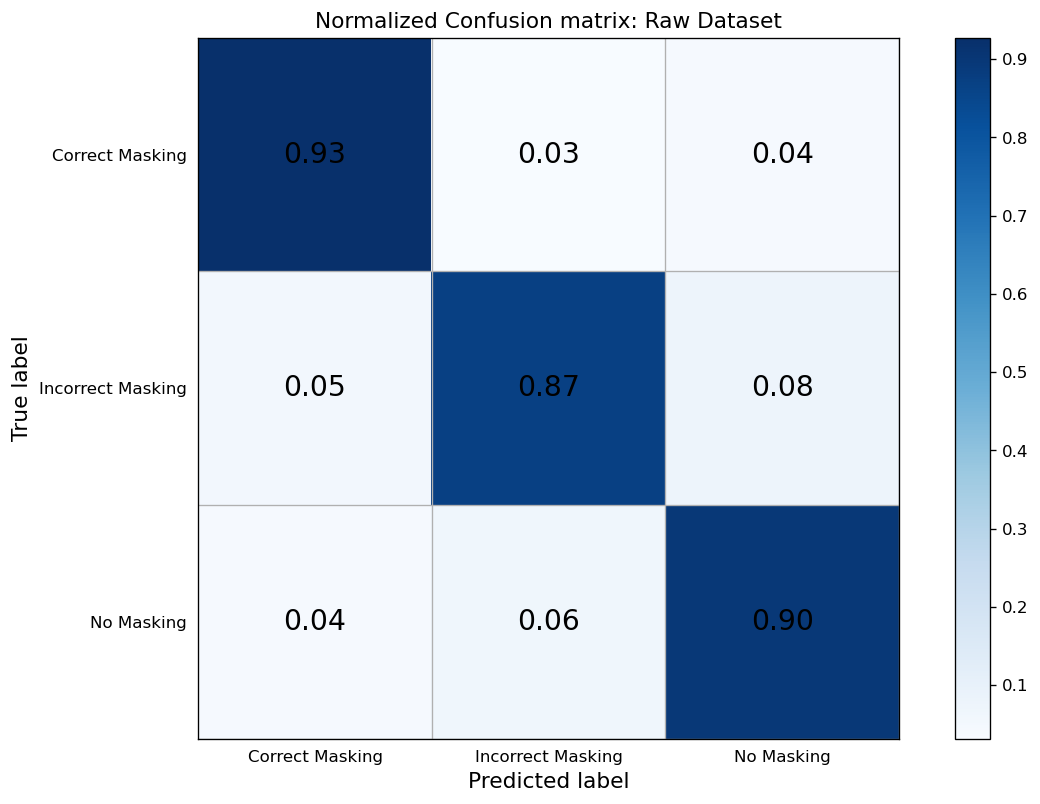

In [64]:
def plot_confusion(confusion):
    labels = ["Correct Masking", "Incorrect Masking", "No Masking"]
    title = "Confusion matrix: Raw Dataset"
    tick_marks = np.array(range(len(labels))) + 0.5
    cm = confusion
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    title = "Normalized " + title
    precision = "%0.2f"
    plt.figure(figsize=(12, 8), dpi=120)
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.0:
            plt.text(x_val, y_val, precision % (c,), color='k', fontsize=17, va='center', ha='center')
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    font = {'size': 13}
    plt.title(title, font)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=0)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label', font)
    plt.xlabel('Predicted label', font)
    plt.show()
plot_confusion(confusion)

In [59]:
model20 = train_svm('../Data/Pixel20/')
model50 = train_svm('../Data/Pixel50/')
# model100 = train_svm('../Data/FaceMask_dataset/Pixel100/')

(4559, 20, 20, 3) (4559,)
[LibSVM]0.8892543859649122
(4559, 50, 50, 3) (4559,)
[LibSVM]0.8870614035087719
